# Introduction: IPython Widgets

In this notebook, we will get an introduction to IPython widgets. These are tools that allow us to build interactivity into our notebooks often with a single line of code. These widgets are very useful for data exploration and analysis, for example, selecting certain data or updating charts. In effect, Widgets allow you to make Jupyter Notebooks into an interactive dashboard instead of a static document.

Run the below cell if needed. You can also do this from the command line. If in Jupyter lab, [check out the instructions for that environment](https://ipywidgets.readthedocs.io/en/stable/user_install.html). 

In [1]:
!pip install -U -q ipywidgets
!jupyter nbextension enable --py widgetsnbextension

zsh:1: command not found: jupyter


In [2]:
!pip install numpy
!pip install pandas
!pip install scipy
!pip install plotly
!pip install cufflinks
!pip install pyarrow
!pip install matplotlib

In [7]:
!pip install pyarrow

     |████████████████████████████████| 19.1 MB 194 kB/s eta 0:00:011
You should consider upgrading via the '/Users/amitrathi/.virtualenvs/loaded2/bin/python3.6 -m pip install --upgrade pip' command.


These are the other imports will use. 

In [4]:
# Standard Data Science Helpers
import numpy as np
import pandas as pd
import scipy

#import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

import cufflinks as cf
cf.go_offline(connected=True)
cf.set_config_file(colorscale='plotly', world_readable=True)

# Extra options
pd.options.display.max_rows = 30
pd.options.display.max_columns = 25

# Show all code cells outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [5]:
import os
from IPython.display import Image, display, HTML

## Data

For this project, we'll work with my medium stats data. You can grab your own data or just use mine! 

In [8]:
df = pd.read_parquet("https://github.com/Archana-blog/notebooks/blob/6963e561905bf15daa3a87f1ecae87cda8481699/data?raw=true", engine='pyarrow')
df.head()

,claps,days_since_publication,fans,link,num_responses,publication,published_date,read_ratio,read_time,reads,started_date,tags,text,title,title_word_count,type,views,word_count,claps_per_word,editing_days,<tag>Education,<tag>Data Science,<tag>Towards Data Science,<tag>Machine Learning,<tag>Python
129,2,597.301123,2,https://medium.com/p/screw-the-environment-but...,0,None,2017-06-10 14:25:00,42.17,7,70,2017-06-10 14:24:00,"[Climate Change, Economics]","Screw the Environment, but Consider Your Walle...","Screw the Environment, but Consider Your Wallet",8,published,166,1859,0.001076,0,0,0,0,0,0
125,18,589.983168,3,https://medium.com/p/the-vanquishing-of-war-pl...,0,None,2017-06-17 22:02:00,30.34,14,54,2017-06-17 22:02:00,"[Climate Change, Humanity, Optimism, History]","The Vanquishing of War, Plague and Famine Part...","The Vanquishing of War, Plague and Famine",8,published,178,3891,0.004626,0,0,0,0,0,0
132,51,577.363292,20,https://medium.com/p/capstone-project-mercedes...,0,None,2017-06-30 12:55:00,20.02,42,222,2017-06-30 12:00:00,"[Machine Learning, Python, Udacity, Kaggle]",Capstone Project: Mercedes-Benz Greener Manufa...,Capstone Project: Mercedes-Benz Greener Manufa...,7,published,1109,12025,0.004241,0,0,0,0,1,1
126,0,576.520688,0,https://medium.com/p/home-of-the-scared-5af0fe...,0,None,2017-07-01 09:08:00,35.85,9,19,2017-06-30 18:21:00,"[Politics, Books, News, Media Criticism]",Home of the Scared A review of A Culture of Fe...,Home of the Scared,4,published,53,2533,0.000000,0,0,0,0,0,0
121,0,572.533035,0,https://medium.com/p/the-triumph-of-peace-f485...,0,None,2017-07-05 08:51:00,8.47,14,5,2017-07-03 20:18:00,"[Books, Psychology, History, Humanism]",The Triumph of Peace A review of The Better An...,The Triumph of Peace,4,published,59,3892,0.000000,1,0,0,0,0,0


In [9]:
df.describe()

,claps,days_since_publication,fans,num_responses,read_ratio,read_time,reads,title_word_count,views,word_count,claps_per_word,editing_days,<tag>Education,<tag>Data Science,<tag>Towards Data Science,<tag>Machine Learning,<tag>Python
count,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000
mean,1815.263158,248.407273,352.052632,7.045113,29.074662,12.917293,6336.300752,7.127820,23404.030075,3029.120301,0.957638,20.330827,0.729323,0.609023,0.436090,0.383459,0.315789
std,2449.074661,179.370879,479.060117,9.056108,12.417670,9.510795,9007.284726,3.158475,33995.636496,2393.414456,1.846756,74.111579,0.445989,0.489814,0.497774,0.488067,0.466587
min,0.000000,1.218629,0.000000,0.000000,8.110000,1.000000,1.000000,2.000000,3.000000,163.000000,0.000000,-13.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,121.000000,74.543822,23.000000,0.000000,20.020000,8.000000,363.000000,5.000000,1375.000000,1653.000000,0.052115,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,815.000000,245.416130,136.000000,4.000000,27.060000,10.000000,2049.000000,7.000000,7608.000000,2456.000000,0.421525,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,2700.000000,376.080598,528.000000,12.000000,34.910000,14.000000,7815.000000,8.000000,30141.000000,3553.000000,1.099366,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,13600.000000,597.301123,2588.000000,59.000000,74.370000,54.000000,41978.000000,16.000000,173714.000000,15063.000000,17.891817,349.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [11]:
@interact
def show_articles_more_than(column='claps', x=5000):
    display(HTML(f'<h2>Showing articles with more than {x} {column}<h2>'))
    display(df.loc[df[column] > x, ['title', 'published_date', 'read_time', 'tags', 'views', 'reads']])

interactive(children=(Text(value='claps', description='column'), IntSlider(value=5000, description='x', max=15…

<Figure size 432x288 with 0 Axes>

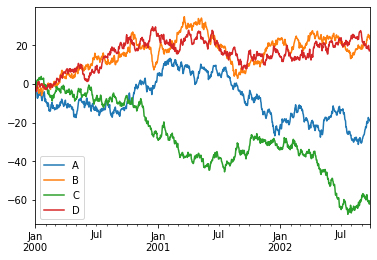

In [12]:
import matplotlib.pyplot as plt

ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list("ABCD"))

df = df.cumsum()
plt.figure();
df.plot();

# Correlation

In [13]:
@interact
def correlations(column1=list(df.select_dtypes('number').columns), 
                 column2=list(df.select_dtypes('number').columns)):
    print(f"Correlation: {df[column1].corr(df[column2])}")

interactive(children=(Dropdown(description='column1', options=('A', 'B', 'C', 'D'), value='A'), Dropdown(descr…

# Interactive Widgets for Plots

In [14]:
@interact
def scatter_plot(x=list(df.select_dtypes('number').columns), 
                 y=list(df.select_dtypes('number').columns)[1:]):
    df.iplot(kind='scatter', x=x, y=y, mode='markers', 
             xTitle=x.title(), yTitle=y.title(), title=f'{y.title()} vs {x.title()}')


interactive(children=(Dropdown(description='x', options=('A', 'B', 'C', 'D'), value='A'), Dropdown(description…

#Heatmaps

In [16]:
import plotly.figure_factory as ff

corrs = df.corr()

@interact_manual
def plot_corrs(colorscale='RdBu'):
    figure = ff.create_annotated_heatmap(z = corrs.round(2).values, 
                                     x =list(corrs.columns), 
                                     y=list(corrs.index), 
                                     colorscale=colorscale,
                                     annotation_text=corrs.round(2).values)
    iplot(figure)

interactive(children=(Text(value='RdBu', description='colorscale'), Button(description='Run Interact', style=B…